In [33]:
import sys
sys.path.append("../")

In [34]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [35]:
def createDf(output):
    agents = ['RandomAgent','RegressorAgent','ClassifierAgent','GreedyAgent','RegressorMultiAgent']
    scenarios = ['Junction']
    all_json=[]
    for i in range(0, 100):
        for s in scenarios:
            for agentRed, agentBlue in product(agents, agents):
                file_name=f'../{output}/{agentRed}_{agentBlue}_{s}_{i}.json'
                data=json.load(open(file_name))
                all_json.append(data)  
    df=pd.DataFrame(all_json)
    return df

In [36]:
def addWinnerColumn(df):
    winner_agent=[]
    for i in range(len(df)):
        if ((df["teamRed"][i] == "RegressorAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RegressorAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RegressorAgent")
        elif ((df["teamRed"][i] == "ClassifierAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "ClassifierAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("ClassifierAgent")
        elif ((df["teamRed"][i] == "RandomAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RandomAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RandomAgent")
        elif ((df["teamRed"][i] == "GreedyAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "GreedyAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("GreedyAgent")
        elif ((df["teamRed"][i] == "RegressorMultiAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RegressorMultiAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RegressorMultiAgent")
    return winner_agent


In [37]:
def matchesWonForEachAgent(df):
    print("PERCENTUALI GENERALI")
    df['winnerAgent'].value_counts().plot.bar(title='games won for each agent')
    print('Percentuale vincita Regressor:',len(df[df['winnerAgent']=="RegressorAgent"])/len(df))
    print('Percentuale vincita Classifier:',len(df[df['winnerAgent']=="ClassifierAgent"])/len(df))
    print('Percentuale vincita RandomAgent:',len(df[df['winnerAgent']=="RandomAgent"])/len(df))
    print('Percentuale vincita GreedyAgent:',len(df[df['winnerAgent']=="GreedyAgent"])/len(df))
    print('Percentuale vincita RegressorMulti:',len(df[df['winnerAgent']=="RegressorMultiAgent"])/len(df))

In [38]:
def agentVSagent(df,agent1,agent2):
    print("AGENTE VS AGENTE")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} su {agent2}')
    print(f'Percentuale vincita {agent1} su {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax)
        ax.set_ylabel('Percentuale vittoria')
        ax.set(ylim=(0, 100))
        ax.set_title('scenario - {}'.format(name), fontsize=10)
        #print(f'Percentuale vincita {agent1} su {agent2} su scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [39]:
def agentVSagentColor(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentuale vincita {agent1} Red su {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Red su {agent2} Blue su scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentuale vincita {agent1} Blue su {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Blue su {agent2} Red su scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax)
        ax.set_ylabel('Percentuale vittoria')
        ax.set(ylim=(0, 100))
        ax.set_title('scenario - {}'.format(name), fontsize=10)
        #print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



In [40]:
def agentVSagentMoreScenario(df,agent1,agent2):
    print("AGENTE VS AGENTE")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} su {agent2}')
    print(f'Percentuale vincita {agent1} su {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(f'Percentuale vincita {agent1} su {agent2} su scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [41]:
def agentVSagentColorMoreScenario(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentuale vincita {agent1} Red su {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Red su {agent2} Blue su scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentuale vincita {agent1} Blue su {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Blue su {agent2} Red su scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



In [42]:
dfAll=createDf("output")
dfAll["winnerAgent"]=addWinnerColumn(dfAll)

PERCENTUALI GENERALI
Percentuale vincita Regressor: 0.1776
Percentuale vincita Classifier: 0.1736
Percentuale vincita RandomAgent: 0.1776
Percentuale vincita GreedyAgent: 0.2788
Percentuale vincita RegressorMulti: 0.1924
AGENTE VS AGENTE
Percentuale vincita RegressorAgent su RandomAgent: 0.525
AGENTE VS AGENTE
Percentuale vincita RegressorAgent su GreedyAgent: 0.195
AGENTE VS AGENTE
Percentuale vincita RegressorAgent su ClassifierAgent: 0.51
AGENTE VS AGENTE
Percentuale vincita RegressorAgent su RegressorMultiAgent: 0.49
AGENTE VS AGENTE PER COLORE
Percentuale vincita RegressorAgent Red su RandomAgent Blue: 0.12
AGENTE VS AGENTE PER COLORE
Percentuale vincita RegressorAgent Blue su RandomAgent Red: 0.93
AGENTE VS AGENTE PER COLORE
Percentuale vincita RegressorAgent Red su GreedyAgent Blue: 0.21
AGENTE VS AGENTE PER COLORE
Percentuale vincita RegressorAgent Blue su GreedyAgent Red: 0.18
AGENTE VS AGENTE PER COLORE
Percentuale vincita RegressorAgent Red su ClassifierAgent Blue: 0.04
AGEN

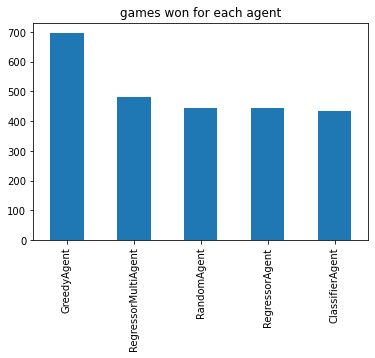

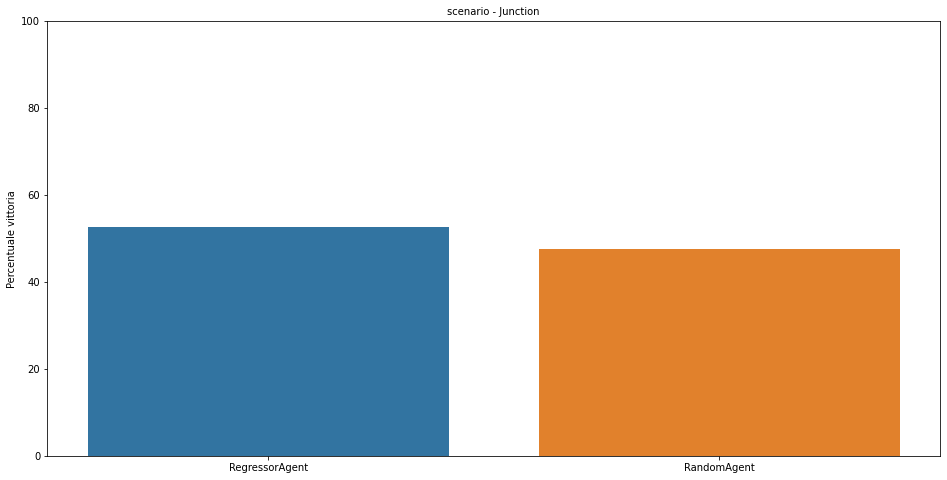

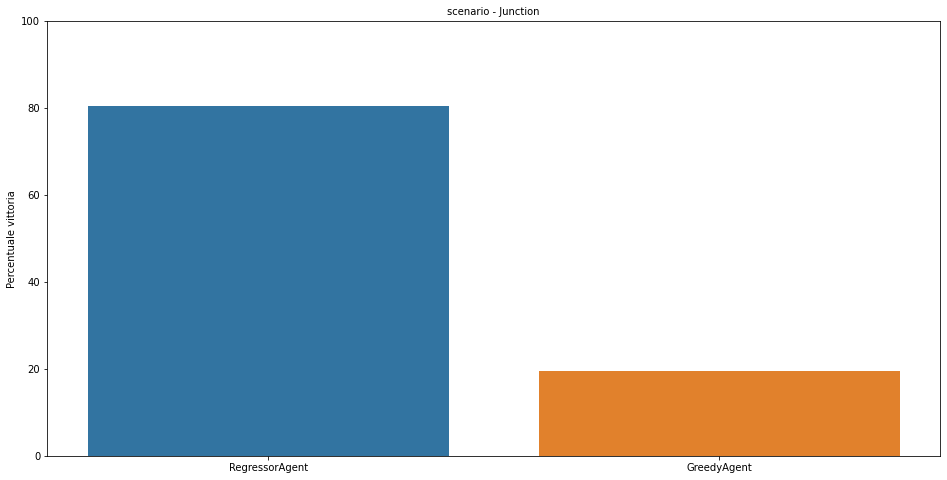

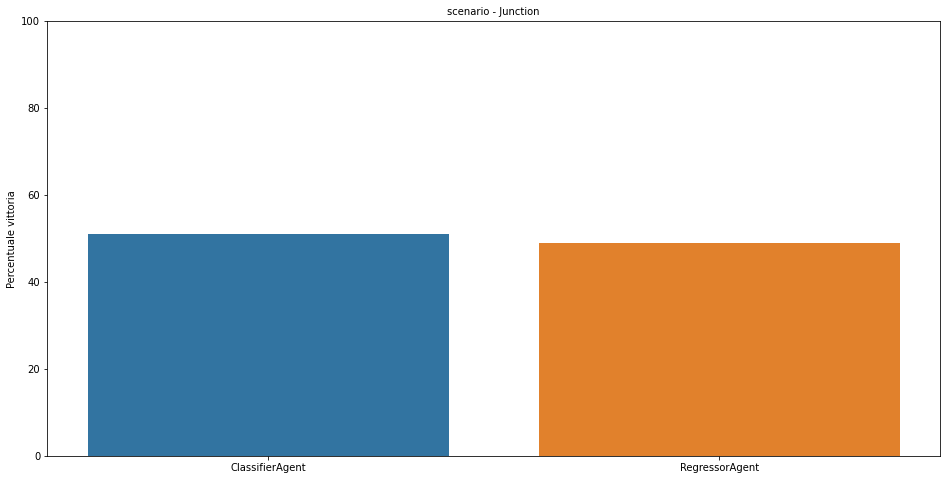

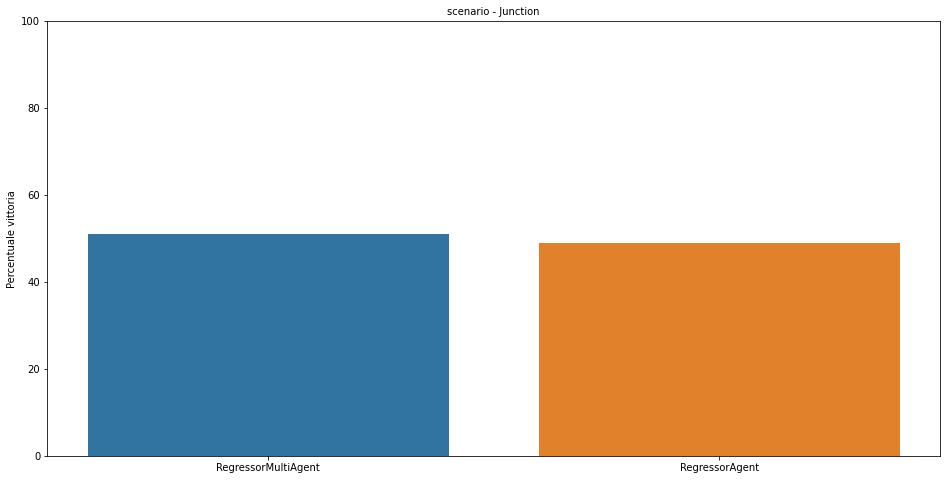

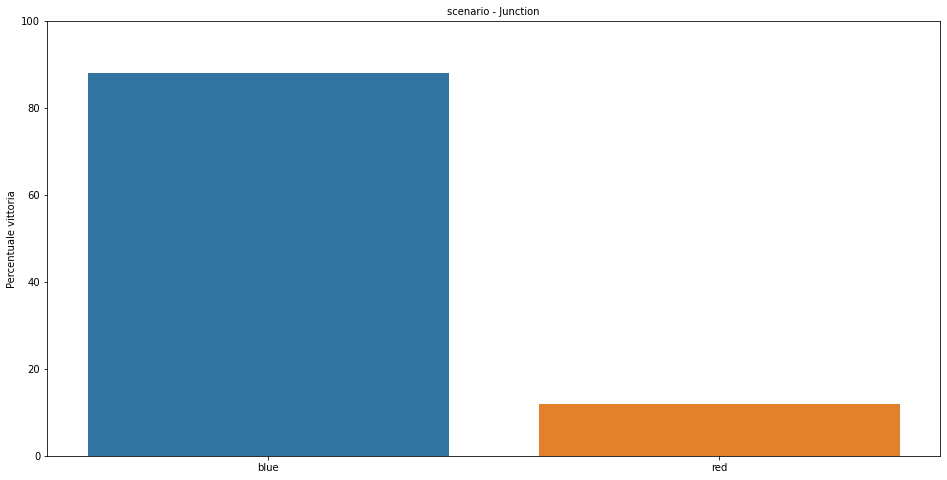

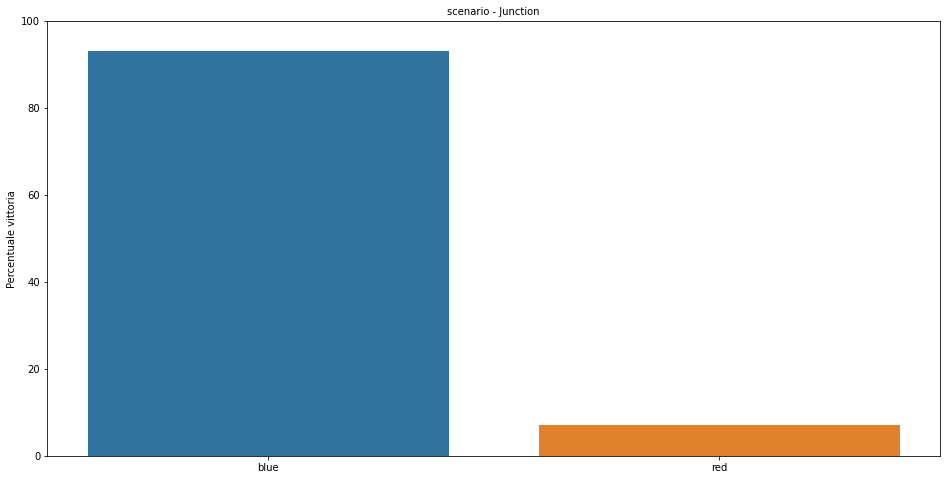

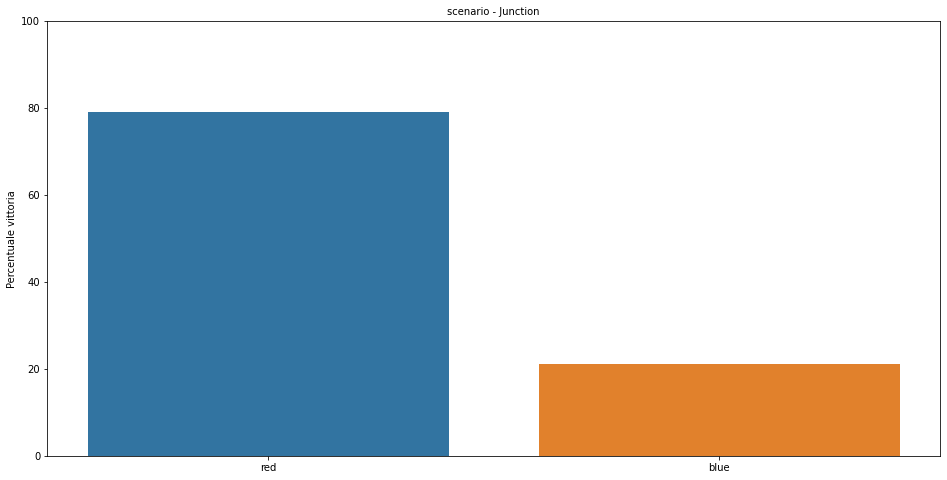

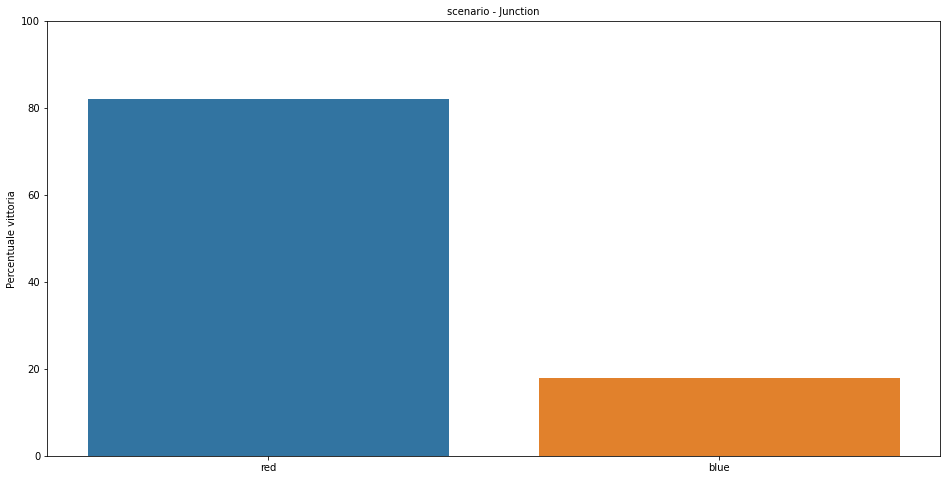

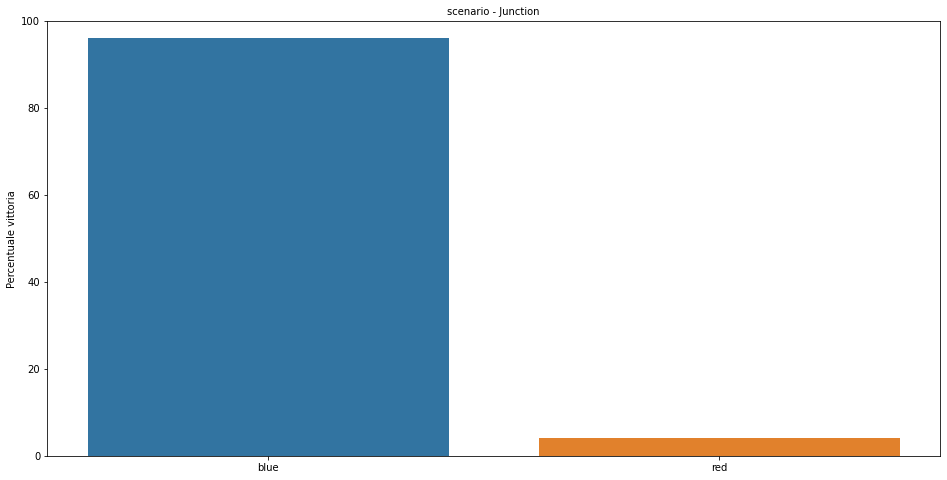

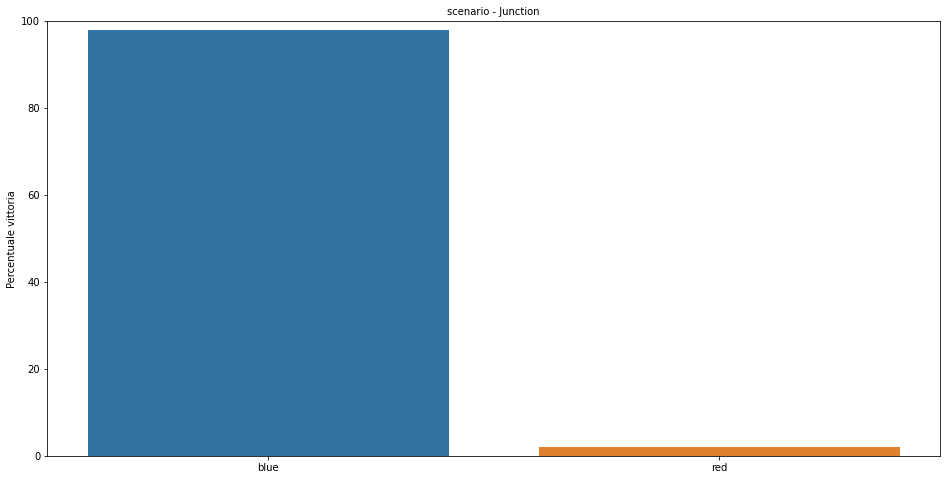

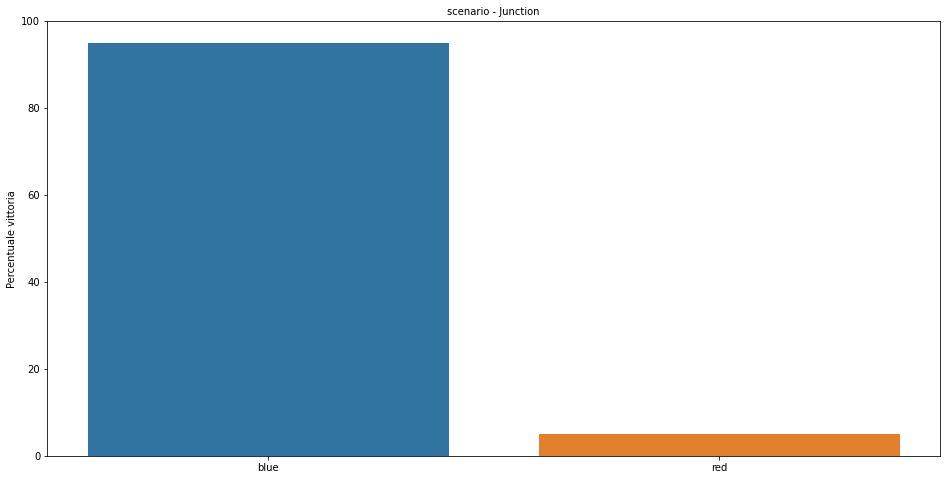

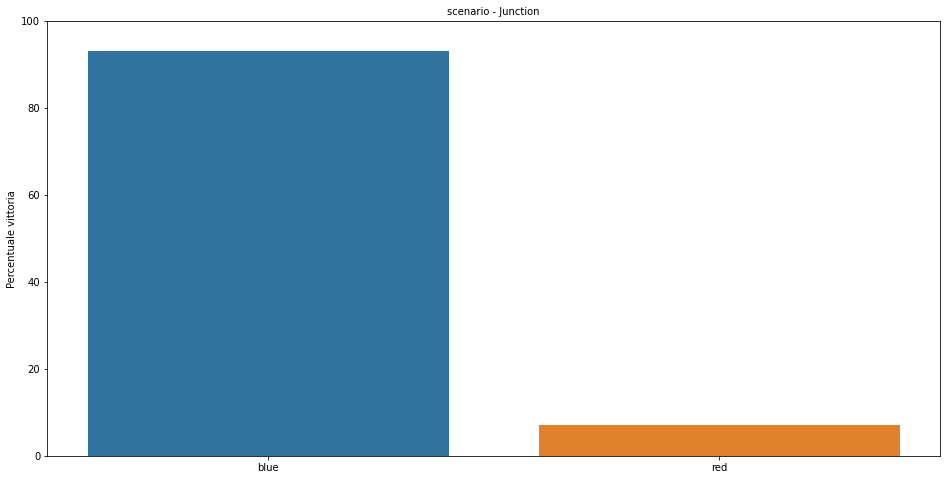

In [43]:
matchesWonForEachAgent(dfAll)
agentVSagent(dfAll,"RegressorAgent","RandomAgent")
agentVSagent(dfAll,"RegressorAgent","GreedyAgent")
agentVSagent(dfAll,"RegressorAgent","ClassifierAgent")
agentVSagent(dfAll,"RegressorAgent","RegressorMultiAgent")

agentVSagentColor(dfAll,"RegressorAgent","RandomAgent","red")
agentVSagentColor(dfAll,"RegressorAgent","RandomAgent","blue")
agentVSagentColor(dfAll,"RegressorAgent","GreedyAgent","red")
agentVSagentColor(dfAll,"RegressorAgent","GreedyAgent","blue")
agentVSagentColor(dfAll,"RegressorAgent","ClassifierAgent","red")
agentVSagentColor(dfAll,"RegressorAgent","ClassifierAgent","blue")
agentVSagentColor(dfAll,"RegressorAgent","RegressorMultiAgent","red")
agentVSagentColor(dfAll,"RegressorAgent","RegressorMultiAgent","blue")




AGENTE VS AGENTE
Percentuale vincita RegressorMultiAgent su RandomAgent: 0.525
AGENTE VS AGENTE
Percentuale vincita RegressorMultiAgent su GreedyAgent: 0.35
AGENTE VS AGENTE
Percentuale vincita RegressorMultiAgent su ClassifierAgent: 0.52
AGENTE VS AGENTE
Percentuale vincita RegressorMultiAgent su RegressorAgent: 0.51


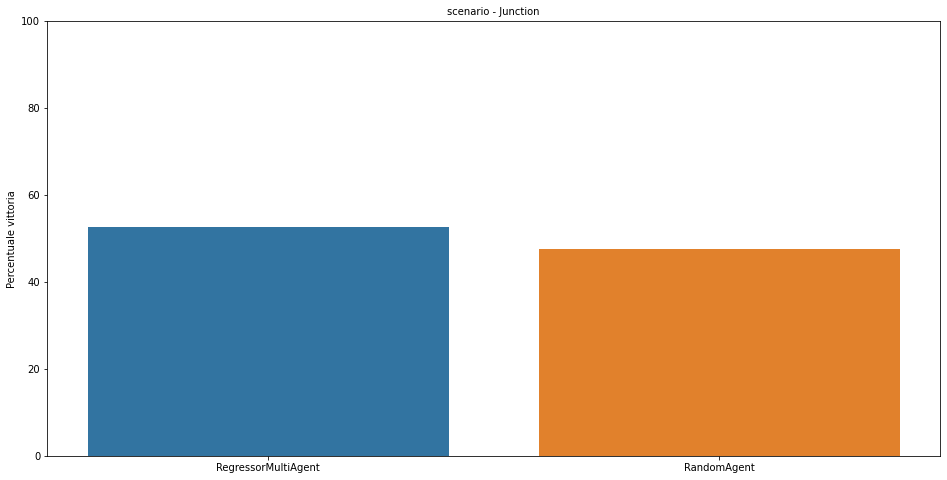

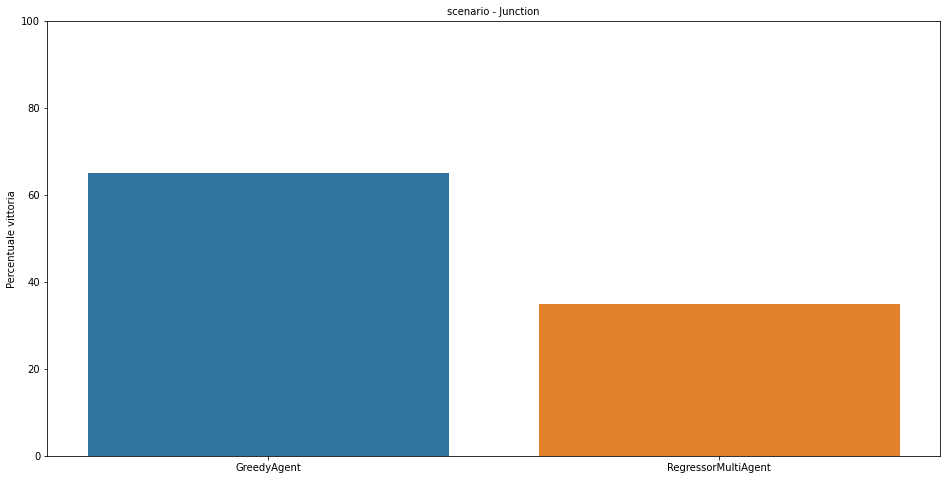

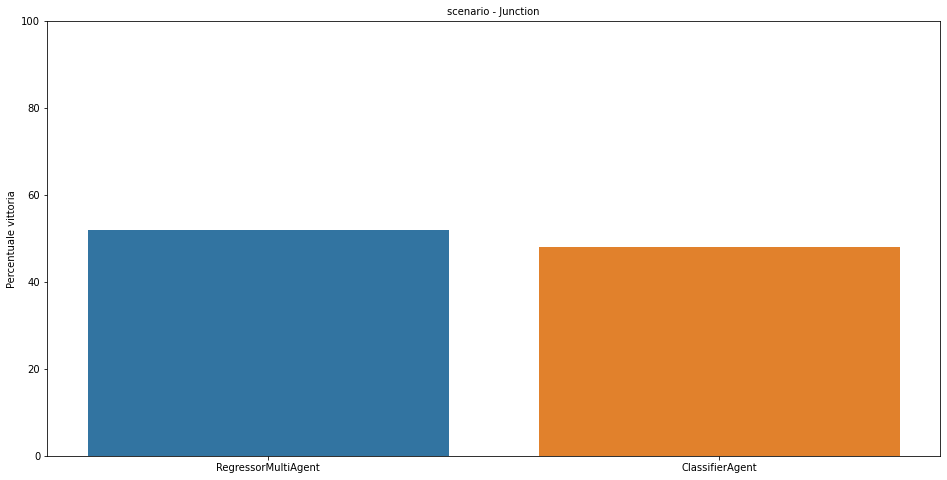

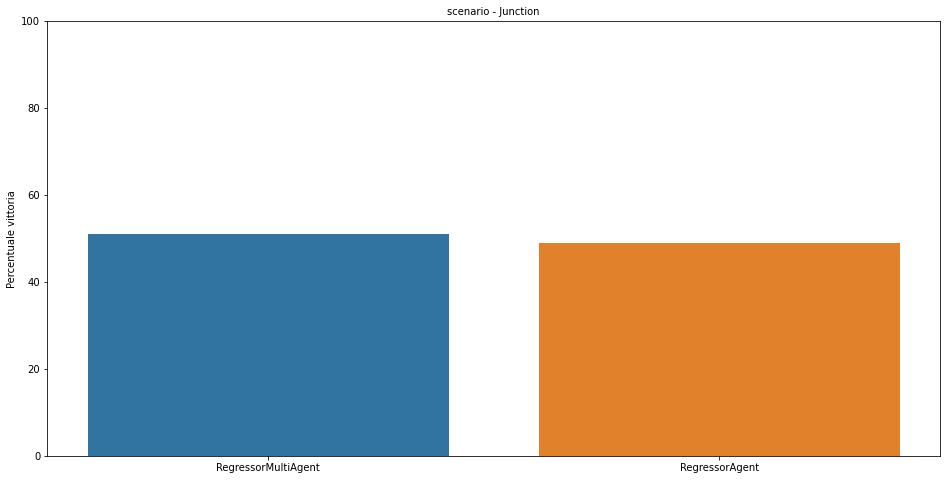

In [44]:
agentVSagent(dfAll,"RegressorMultiAgent","RandomAgent")
agentVSagent(dfAll,"RegressorMultiAgent","GreedyAgent")
agentVSagent(dfAll,"RegressorMultiAgent","ClassifierAgent")
agentVSagent(dfAll,"RegressorMultiAgent","RegressorAgent")